# Report

Purpose

    The purpose of the assignment is to explore and understand the fundamental concepts of some search algorithms in          Artificial Intelligence. This assignment also serves to measure the different algorithms to analyze the differences in efficiency between them.

Problem

    This assignment consisted in solving two problems. The first problem pertains to finding the shortest path between two points on a plane that contains convex polygonal obstacles. The objective is to determine the most efficient   path that minimizes the distance traveled while circumventing these obstacles.
    
    The second problem is a classic scenario in artificial intelligence and problem-solving. The challenge involves    transporting three missionaries and three cannibals across a river using a boat that can carry one or two          individuals at a time. The objective is to accomplish this task without ever leaving a group of missionaries        outnumbered by cannibals on either side of the river.

Considerations

Shortest path to the goal state

    If the state space encompasses all positions (x, y) in the plane, it implies a continuous space with an infinite   number of states and potential paths to the goal.
    Firstly, the paths cannot intersect with the polygonal obstacles, necessitating navigation around them. Secondly,   in Euclidean space, straight lines represent the shortest distance between two points, implying that straight-line segments will optimize the path between vertices. Any deviation from a straight line would naturally increase the               total distance. Considering these points, we can deduce that the shortest path between two vertices in our problem will comprise straight-line segments circumventing the polygons. Thus, the optimal path between vertices of polygons will either traverse through these vertices or directly connect them via straight-line segments.
    Consequently, a well-defined state space would encompass all vertices within the environment. Hence, the total     number of states would consist of the total number of vertices in the plane, 35 in this case.


Missionary and cannibals problem

    To effectively solve the Missionaries and Cannibals problem, several considerations must be made in its formulation    .The states are defined by the number of missionaries and cannibals on each side of the river, along with the         location of the boat. States where the number of cannibals exceeds the number of missionaries on either side of the river are invalid and therefore excluded from consideration.
    The initial state is characterized by having all missionaries and cannibals situated on one side of the river,      with the boat also on that same side. The available action involves transporting one or two individuals                  (no more, no less) from the side where the boat is currently located to the opposite side.
    In the transition model, executing an action entails changing the location of the boat and adjusting the count        of people on each side accordingly—subtracting the transported individuals from one side and adding them to the       other.

    The goal test verifies whether all individuals have been successfully relocated to the opposite side of the river    from the initial state. As for the path cost, each step taken incurs a cost of 1.

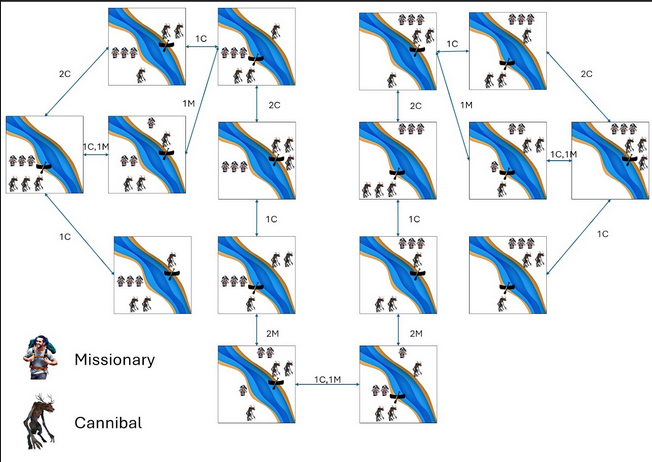


    Figure 1: state space diagram for the Missionaries and Cannibals Problem

    From the state space diagram, it becomes apparent that only four distinct solutions to the problem exist without     repeating states. However, what may not be immediately evident is that the majority of possible actions are either impermissible or merely undo the previous step. This complexity creates a situation where numerous options seem     available for consideration, yet a clear path forward remains elusive.

Experimental setup
 
Shortest Path to the Goal State

    To establish this experiment, we constructed the environment using code sourced from rayheberer’s GitHub Repository [1]. The functions delineated within this code facilitated the determination of vertex locations, their connections to form polygons, identification of reachable vertices from the current vertex, and specification of the start and goal states.
    In this experiment, we deployed four algorithms obtained from the UC Berkeley code repository [2]: Breadth-First    Graph Search, Depth-First Graph Search, A* Search, and Uniform Cost Search. Each algorithm utilized straight-line     distance to the goal state as the heuristic function.

Missionaries and Cannibals Problem

    For this classic problem, we utilized functions derived from the UC Berkeley code repository [2]. These functions  enabled us to initialize the problem, define valid actions, and establish the criteria for goal testing. In this     context, we employed three distinct algorithms: Breadth-First Graph Search, Uniform Cost Search, and Iterative     Deepening Search. Our objective was to assess the performance of these algorithms and conduct a comparative        analysis.

Results

Shortest path to goal state

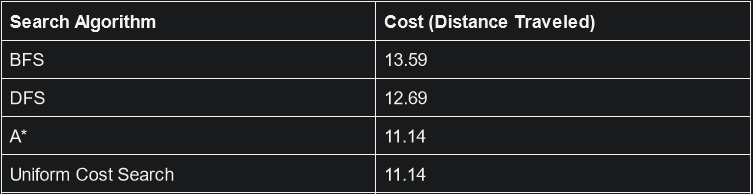

    Table 1: Search



Missionaries and Cannibals Problem
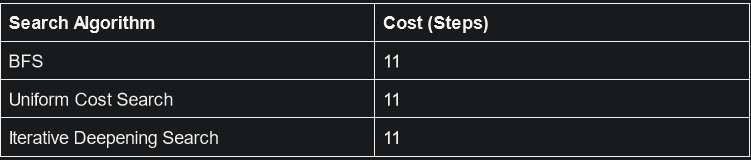

    Table 2: Search

Analysis

    Table 1 demonstrates that the A* and Uniform Cost Search algorithms were the most effective in identifying the     optimal path from the initial state to the goal state. A* particularly excelled due to its informed nature,          enabling it to efficiently navigate solution spaces compared to uninformed search algorithms. Conversely, the            Uniform Cost Search Algorithm, an uninformed approach, evaluates the total cost of steps towards the goal state.   Notably, Breadth First Search is only optimal under conditions where all steps carry identical costs. Conversely,  Depth First Search does not guarantee the identification of the most optimal solution.
    In Table 2, we observe that all algorithms exhibited optimality in solving the Missionaries and Cannibals problem. This phenomenon can be attributed to the inherent characteristics of the problem itself. Given that all solutions  entail an identical number of steps if states do not repeat, the optimality of each algorithm is expected.                   Consequently, all algorithms employed proved optimal in this scenario.


Concluding remarks

    This study delves into the analysis of various search algorithms to tackle a range of challenges, highlighting the crucial selection of the appropriate algorithm based on the specificities of the problem at hand. In the first      scenario, the shortest path between an initial state and a target state was sought, considering straight lines        between the vertices of polygons as viable routes. In this case, the A* algorithm and Uniform Cost Search stood out for their effectiveness. On the other hand, in the second challenge it was imposed that the missionaries could             never be outnumbered, assigning a uniform cost to each action and leading to the conclusion that all evaluated      algorithms offered optimal solutions by presenting the same cost. This work underscores the importance of a          meticulous selection of search algorithms, specifically tailored to the characteristics and restrictions of each      problem, to achieve optimal solutions.


Task Distribution

Javier: Report

Reinaldo: Presentation and Report

Anton: Code and Report



References

[1]
R. Heberer, “GitHub,” 31 March 2019. [Online]. Available: https://github.com/rayheberer/AI-A-Modern-Approach/blob/master/Chapter%203%20Solving%20Problems%20by%20Searching/Shortest%20Path.ipynb. [Accessed: 25 March 2024].



 [2]  "GitHub - aimacode/aima-python: Python implementation of algorithms from Russell And Norvig's "Artificial Intelligence - A Modern Approach"," [Online]. Available: https://github.com/aimacode/aima-python. [Accessed 31 March 2024].






Appendix

# Exercise 3.7

In [12]:
import matplotlib.pyplot as plt

class Vertex(object):
    def __init__(self, x, y, name):
        self.location = (x, y)
        self.name = name
        self.reachable = {}
        self.edges = []
        
class StateSpace(object):
    def __init__(self):
        self.vertices = {}
        self.edges = []
        self.start = None
        self.goal = None
        
    def add_vertex(self, x, y, name):
        """Add a vertex to the list of vertices in the state."""
        self.vertices[name] = Vertex(x, y, name)
        
    def set_start(self, x, y, name="S"):
        start = Vertex(x, y, name)
        self.vertices[name] = start
        self.start = start
        
    def set_goal(self, x, y, name="G"):
        goal = Vertex(x, y, name)
        self.vertices[name] = goal
        self.goal = goal
        
    def add_edge(self, a, b):
        """Add a polygon edge linking two vertices."""
        assert a in self.vertices and b in self.vertices
        
        self.vertices[a].edges.append(b)
        self.vertices[b].edges.append(a)
        
        self.edges.append(([self.vertices[a].location[0], 
                            self.vertices[b].location[0]], 
                           [self.vertices[a].location[1], 
                            self.vertices[b].location[1]]))
        
        # reachable by default
        self.assert_reachable(a, b)
        
    def connect_polygon(self, v_names):
        for i in range(len(v_names) - 1):
            self.add_edge(v_names[i], v_names[i+1])
        self.add_edge(v_names[0], v_names[-1])
        
    def assert_reachable(self, a, b):
        """Assert that pair of vertices are reachable from each other."""
        assert a in self.vertices
        
        if type(b) != list:
            b = [b]
        
        for v in b:
            assert v in self.vertices
            delta_x = self.vertices[v].location[0] - self.vertices[a].location[0]
            delta_y = self.vertices[v].location[1] - self.vertices[a].location[1]

            self.vertices[a].reachable[(delta_x, delta_y)] = v
            self.vertices[v].reachable[(-delta_x, -delta_y)] = a
        
    def draw(self):
        fig, ax = plt.subplots()
        for edge in self.edges:
            ax.plot([*edge[0]], [*edge[1]], color="black")
            
        if self.start:
            ax.plot(*self.start.location, "bo")
        if self.goal:
            ax.plot(*self.goal.location, "go")

In [13]:
# Initialize and connect vertices on the same polygons
# Use convention of starting at bottom or bottom-left vertex, going around clockwise

env = StateSpace()

# start
env.set_start(0.0, 0.7)

# rectangle
env.add_vertex(0.5, 0.0, "rec1")
env.add_vertex(0.5, 1.4, "rec2")
env.add_vertex(4.6, 1.4, "rec3")
env.add_vertex(4.6, 0.0, "rec4")

env.connect_polygon(["rec1", "rec2", "rec3", "rec4"])

# pentagon
env.add_vertex(1.7, 2.0, "pent1")
env.add_vertex(0.3, 2.3, "pent2")
env.add_vertex(0.0, 3.8, "pent3")
env.add_vertex(1.5, 5.1, "pent4")
env.add_vertex(2.6, 3.7, "pent5")

env.connect_polygon(["pent1", "pent2", "pent3", "pent4", "pent5"])

# triangle
env.add_vertex(2.5, 1.8, "tri1")
env.add_vertex(3.1, 4.0, "tri2")
env.add_vertex(3.7, 1.8, "tri3")

env.connect_polygon(["tri1", "tri2", "tri3"])

# quadrilateral
env.add_vertex(3.9, 3.3, "quad1")
env.add_vertex(3.7, 4.9, "quad2")
env.add_vertex(4.8, 5.1, "quad3")
env.add_vertex(5.7, 4.4, "quad4")

env.connect_polygon(["quad1", "quad2", "quad3", "quad4"])

# triangle 2
env.add_vertex(5.4, 0.7, "tri_2_1")
env.add_vertex(4.9, 2.6, "tri_2_2")
env.add_vertex(6.3, 1.5, "tri_2_3")

env.connect_polygon(["tri_2_1", "tri_2_2", "tri_2_3"])

# rectangle 2
env.add_vertex(5.8, 2.2, "rec_2_1")
env.add_vertex(5.8, 5.0, "rec_2_2")
env.add_vertex(7.5, 5.0, "rec_2_3")
env.add_vertex(7.5, 2.2, "rec_2_4")

env.connect_polygon(["rec_2_1", "rec_2_2", "rec_2_3", "rec_2_4"])

# hexagon
env.add_vertex(7.7, 0.0, "hex1")
env.add_vertex(6.8, 0.6, "hex2")
env.add_vertex(6.8, 1.5, "hex3")
env.add_vertex(7.7, 2.2, "hex4")
env.add_vertex(8.5, 1.5, "hex5")
env.add_vertex(8.5, 0.4, "hex6")

env.connect_polygon(["hex1", "hex2", "hex3", "hex4", "hex5", "hex6"])

# quadrilateral 2
env.add_vertex(8.7, 1.8, "quad_2_1")
env.add_vertex(7.8, 4.7, "quad_2_2")
env.add_vertex(8.6, 5.0, "quad_2_3")
env.add_vertex(8.9, 4.5, "quad_2_4")

env.connect_polygon(["quad_2_1", "quad_2_2", "quad_2_3", "quad_2_4"])

# goal
env.set_goal(9.1, 5.0)

In [14]:
# Assert reachability between vertices on different polygons
# Since this is not the focus of the question, hard coding instead of inferring
# this geometrically seems fine.

# start
env.assert_reachable("S", ["rec1", "rec2", "pent2", "pent3"])

# rectangle
env.assert_reachable("rec1", ["pent2", "pent3"])
env.assert_reachable("rec2", ["pent1", "pent2", "tri1", "tri3"])
env.assert_reachable("rec3", ["pent1", "tri1", "tri2", "tri3", "quad1", "tri_2_1", "tri_2_2"])
env.assert_reachable("rec4", ["tri_2_1", "tri_2_2", "tri_2_3", "hex1", "hex2", "hex3", "rec_2_4"])

# pentagon
env.assert_reachable("pent1", ["tri1", "tri2"])
env.assert_reachable("pent4", ["tri2", "quad2", "quad3"])
env.assert_reachable("pent5", ["tri1", "tri2", "quad2"])

# triangle
env.assert_reachable("tri2", ["quad1", "quad2", "tri_2_1"])
env.assert_reachable("tri3", ["quad1", "quad2", "quad4", "tri_2_2"])

# quadrilateral
env.assert_reachable("quad1", ["tri_2_1", "tri_2_2", "rec_2_1"])
env.assert_reachable("quad3", ["rec_2_2", "rec_2_3", "quad_2_3"])
env.assert_reachable("quad4", ["tri_2_2", "rec_2_1", "rec_2_2"])

# triangle 2
env.assert_reachable("tri_2_1", ["rec_2_4", "hex1", "hex2", "hex3", "hex4"])
env.assert_reachable("tri_2_2", ["rec_2_1", "hex3"])
env.assert_reachable("tri_2_3", ["rec_2_1", "rec_2_4", "hex2", "hex3", "hex4"])

# rectangle 2
env.assert_reachable("rec_2_1", ["hex3", "hex4"])
env.assert_reachable("rec_2_2", "quad_2_3")
env.assert_reachable("rec_2_3", ["quad_2_1", "quad_2_2", "quad_2_3", "hex4", "hex5"])
env.assert_reachable("rec_2_4", ["hex3", "hex4", "quad_2_1", "quad_2_2"])

# hexagon
env.assert_reachable("hex4", ["quad_2_1", "quad_2_2"])
env.assert_reachable("hex5", ["quad_2_1", "quad_2_2"])
env.assert_reachable("hex6", ["quad_2_1", "G"])

# quadrilateral 2
env.assert_reachable("quad_2_1", "G")
env.assert_reachable("quad_2_3", "G")
env.assert_reachable("quad_2_4", "G")

In [15]:
display(env.vertices["S"].reachable)
display(env.vertices["G"].reachable)

{(0.5, -0.7): 'rec1',
 (0.5, 0.7): 'rec2',
 (0.3, 1.5999999999999999): 'pent2',
 (0.0, 3.0999999999999996): 'pent3'}

{(-0.5999999999999996, -4.6): 'hex6',
 (-0.40000000000000036, -3.2): 'quad_2_1',
 (-0.5, -0.0): 'quad_2_3',
 (-0.1999999999999993, -0.5): 'quad_2_4'}

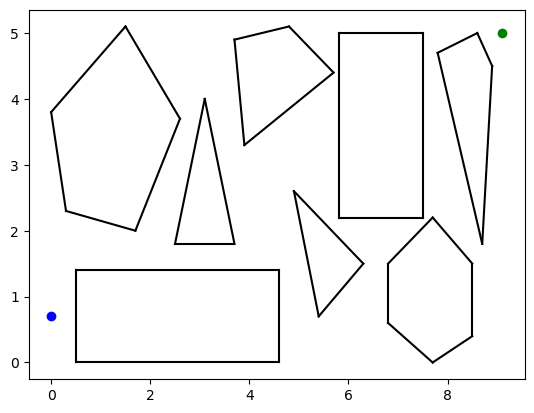

In [16]:
env.draw()

In [17]:
from search import Problem, astar_search
import math

class ConvexPolygonPathProblem(Problem):
    def __init__(self, initial, goal, state_space):
        super().__init__(initial, goal)
        self.state_space = state_space

    def actions(self, state):
        # Acciones posibles desde un estado: moverse hacia los vértices alcanzables
        return list(self.state_space.vertices[state].reachable.values())

    def result(self, state, action):
        # El resultado de una acción es simplemente el estado al que se mueve
        return action

    def goal_test(self, state):
        # El estado objetivo es alcanzar el punto de destino
        return state == self.goal

    def path_cost(self, c, state1, action, state2):
        # Calculamos el costo del camino como la distancia euclidiana
        (x1, y1) = self.state_space.vertices[state1].location
        (x2, y2) = self.state_space.vertices[state2].location
        return c + math.hypot(x2 - x1, y2 - y1)

    def h(self, node):
        # Heurística: distancia euclidiana hasta la meta
        (x1, y1) = self.state_space.vertices[node.state].location
        (x2, y2) = self.state_space.goal.location
        return math.hypot(x2 - x1, y2 - y1)

# Creating Problem
problem = ConvexPolygonPathProblem('S', 'G', env)

result = astar_search(problem)

# Printing results
print("Path found:", result.solution())
print("Path cost:", result.path_cost)


Path found: ['rec2', 'pent1', 'tri2', 'quad2', 'quad3', 'quad_2_3', 'G']
Path cost: 11.144199369489609


In [18]:
from search import Problem, depth_first_graph_search, breadth_first_graph_search, astar_search, uniform_cost_search
import math

class ConvexPolygonPathProblem(Problem):
    def __init__(self, initial, goal, state_space):
        super().__init__(initial, goal)
        self.state_space = state_space

    def actions(self, state):
        return list(self.state_space.vertices[state].reachable.values())

    def result(self, state, action):
        return action

    def goal_test(self, state):
        return state == self.goal

    def path_cost(self, c, state1, action, state2):
        (x1, y1) = self.state_space.vertices[state1].location
        (x2, y2) = self.state_space.vertices[state2].location
        return c + math.hypot(x2 - x1, y2 - y1)

    def h(self, node):
        (x1, y1) = self.state_space.vertices[node.state].location
        (x2, y2) = self.state_space.goal.location
        return math.hypot(x2 - x1, y2 - y1)


In [19]:
# Creating Problem
problem = ConvexPolygonPathProblem('S', 'G', env)

# Search Algorithm
algorithms = {
    'BFS': breadth_first_graph_search,
    'DFS': depth_first_graph_search,
    'A*': astar_search,
    'Uniform Cost Search': uniform_cost_search,
}

#Execute and display the results of each algorithm.
for name, algorithm in algorithms.items():
    result = algorithm(problem)
    print(f"Algorithm: {name}")
    if result:
        print("Path found:", result.solution())
        print("Path cost:", result.path_cost)
    else:
        print("No solution found.")
    print("-" * 40)


Algorithm: BFS
Path found: ['rec1', 'rec4', 'hex1', 'hex6', 'G']
Path cost: 13.593625119601459
----------------------------------------
Algorithm: DFS
Path found: ['pent3', 'pent4', 'quad3', 'quad_2_3', 'G']
Path cost: 12.686258885877564
----------------------------------------
Algorithm: A*
Path found: ['rec2', 'pent1', 'tri2', 'quad2', 'quad3', 'quad_2_3', 'G']
Path cost: 11.144199369489609
----------------------------------------
Algorithm: Uniform Cost Search
Path found: ['rec2', 'pent1', 'tri2', 'quad2', 'quad3', 'quad_2_3', 'G']
Path cost: 11.144199369489609
----------------------------------------


# Exercise 3.9

In [20]:
from search import Problem, breadth_first_graph_search
import math

class MissionariesCannibalsProblem(Problem):
    def __init__(self, initial=(3, 3, 0), goal=(0, 0, 1)):
        """Initialize the missionaries and cannibals problem."""
        super().__init__(initial, goal)

    def actions(self, state):
        """Return the actions that can be executed in the given state."""
        actions = []
        M, C, B = state
        if B == 0:  # Boat on the original side
            if M >= 2: actions.append((2, 0))  # Two missionaries cross
            if M >= 1: actions.append((1, 0))  # One missionary crosses
            if C >= 2: actions.append((0, 2))  # Two cannibals cross
            if C >= 1: actions.append((0, 1))  # One cannibal crosses
            if C >= 1 and M >= 1: actions.append((1, 1))  # One missionary and one cannibal cross
        else:  # Boat on the other side
            M, C = 3 - M, 3 - C  # Convert to the number of people on the current side
            if M >= 2: actions.append((2, 0))
            if M >= 1: actions.append((1, 0))
            if C >= 2: actions.append((0, 2))
            if C >= 1: actions.append((0, 1))
            if C >= 1 and M >= 1: actions.append((1, 1))
        
        # Filter out invalid actions
        valid_actions = []
        for a in actions:
            if self.is_valid_action(state, a):
                valid_actions.append(a)
        
        return valid_actions

    def is_valid_action(self, state, action):
        """Check if an action is valid for the given state."""
        M, C, B = state
        m, c = action
        if B == 0:  # Boat on the original side
            M, C = M - m, C - c
        else:  # Boat on the other side
            M, C = M + m, C + c
        return (0 <= M <= 3) and (0 <= C <= 3) and (M == 0 or M >= C) and ((3 - M) == 0 or (3 - M) >= (3 - C))

    def result(self, state, action):
        """Return the state that results from executing the given action in the given state."""
        M, C, B = state
        m, c = action
        if B == 0:
            return (M - m, C - c, 1)
        else:
            return (M + m, C + c, 0)

    def goal_test(self, state):
        """Return True if the state is a goal."""
        return state == self.goal

# Let's choose a search algorithm to solve the problem
# We will use breadth_first_graph_search since it is complete and will find the shortest solution if one exists

problem = MissionariesCannibalsProblem()
solution = breadth_first_graph_search(problem)

if solution:
    print("Solution found:", solution.solution())
else:
    print("No solution found.")

Solution found: [(0, 2), (0, 1), (0, 2), (0, 1), (2, 0), (1, 1), (2, 0), (0, 1), (0, 2), (1, 0), (1, 1)]


In [21]:
from search import Problem, uniform_cost_search
import math

class MissionariesCannibalsProblem(Problem):
    def __init__(self, initial=(3, 3, 0), goal=(0, 0, 1)):
        """Initialize the missionaries and cannibals problem."""
        super().__init__(initial, goal)

    def actions(self, state):
        """Return the actions that can be executed in the given state."""
        actions = []
        M, C, B = state
        if B == 0:  # Boat on the original side
            if M >= 2: actions.append((2, 0))  # Two missionaries cross
            if M >= 1: actions.append((1, 0))  # One missionary crosses
            if C >= 2: actions.append((0, 2))  # Two cannibals cross
            if C >= 1: actions.append((0, 1))  # One cannibal crosses
            if C >= 1 and M >= 1: actions.append((1, 1))  # One missionary and one cannibal cross
        else:  # Boat on the other side
            M, C = 3 - M, 3 - C  # Convert to the number of people on the current side
            if M >= 2: actions.append((2, 0))
            if M >= 1: actions.append((1, 0))
            if C >= 2: actions.append((0, 2))
            if C >= 1: actions.append((0, 1))
            if C >= 1 and M >= 1: actions.append((1, 1))
        
        # Filter out invalid actions
        valid_actions = []
        for a in actions:
            if self.is_valid_action(state, a):
                valid_actions.append(a)
        
        return valid_actions

    def is_valid_action(self, state, action):
        """Check if an action is valid for the given state."""
        M, C, B = state
        m, c = action
        if B == 0:  # Boat on the original side
            M, C = M - m, C - c
        else:  # Boat on the other side
            M, C = M + m, C + c
        return (0 <= M <= 3) and (0 <= C <= 3) and (M == 0 or M >= C) and ((3 - M) == 0 or (3 - M) >= (3 - C))

    def result(self, state, action):
        """Return the state that results from executing the given action in the given state."""
        M, C, B = state
        m, c = action
        if B == 0:
            return (M - m, C - c, 1)
        else:
            return (M + m, C + c, 0)

    def goal_test(self, state):
        """Return True if the state is a goal."""
        return state == self.goal

# Let's choose a search algorithm to solve the problem
# We will use breadth_first_graph_search since it is complete and will find the shortest solution if one exists

problem = MissionariesCannibalsProblem()
solution = uniform_cost_search(problem)

if solution:
    print("Solution found:", solution.solution())
else:
    print("No solution found.")

Solution found: [(1, 1), (1, 0), (0, 2), (0, 1), (2, 0), (1, 1), (2, 0), (0, 1), (0, 2), (0, 1), (0, 2)]


In [22]:
from search import Problem, iterative_deepening_search
import math

class MissionariesCannibalsProblem(Problem):
    def __init__(self, initial=(3, 3, 0), goal=(0, 0, 1)):
        """Initialize the missionaries and cannibals problem."""
        super().__init__(initial, goal)

    def actions(self, state):
        """Return the actions that can be executed in the given state."""
        actions = []
        M, C, B = state
        if B == 0:  # Boat on the original side
            if M >= 2: actions.append((2, 0))  # Two missionaries cross
            if M >= 1: actions.append((1, 0))  # One missionary crosses
            if C >= 2: actions.append((0, 2))  # Two cannibals cross
            if C >= 1: actions.append((0, 1))  # One cannibal crosses
            if C >= 1 and M >= 1: actions.append((1, 1))  # One missionary and one cannibal cross
        else:  # Boat on the other side
            M, C = 3 - M, 3 - C  # Convert to the number of people on the current side
            if M >= 2: actions.append((2, 0))
            if M >= 1: actions.append((1, 0))
            if C >= 2: actions.append((0, 2))
            if C >= 1: actions.append((0, 1))
            if C >= 1 and M >= 1: actions.append((1, 1))
        
        # Filter out invalid actions
        valid_actions = []
        for a in actions:
            if self.is_valid_action(state, a):
                valid_actions.append(a)
        
        return valid_actions

    def is_valid_action(self, state, action):
        """Check if an action is valid for the given state."""
        M, C, B = state
        m, c = action
        if B == 0:  # Boat on the original side
            M, C = M - m, C - c
        else:  # Boat on the other side
            M, C = M + m, C + c
        return (0 <= M <= 3) and (0 <= C <= 3) and (M == 0 or M >= C) and ((3 - M) == 0 or (3 - M) >= (3 - C))

    def result(self, state, action):
        """Return the state that results from executing the given action in the given state."""
        M, C, B = state
        m, c = action
        if B == 0:
            return (M - m, C - c, 1)
        else:
            return (M + m, C + c, 0)

    def goal_test(self, state):
        """Return True if the state is a goal."""
        return state == self.goal

# Let's choose a search algorithm to solve the problem
# We will use breadth_first_graph_search since it is complete and will find the shortest solution if one exists

problem = MissionariesCannibalsProblem()
solution = iterative_deepening_search(problem)

if solution:
    print("Solution found:", solution.solution())
else:
    print("No solution found.")

Solution found: [(0, 2), (0, 1), (0, 2), (0, 1), (2, 0), (1, 1), (2, 0), (0, 1), (0, 2), (1, 0), (1, 1)]
